# House Price Prediction Project using SkLearn-Pipeline by Akshay Ghodke

# Read Dataset

In [1]:
import pandas as pd
train = pd.read_csv("D:Data_Sets/Projects/ML_Housing_Project/training_set.csv")
test = pd.read_csv("D:Data_Sets/Projects/ML_Housing_Project/testing_set.csv")

from warnings import filterwarnings 
filterwarnings('ignore')

pd.set_option("display.max_columns",100)
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### Check dataset info

In [2]:
train.shape

(1460, 81)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Checking Unique values in dataset

In [4]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

# Dropping unnecessary columns (Columns with no statitical importance)

In [5]:
train = train.drop(labels=['Id'],axis=1) #Because All Unique

# Missing Data treatment

In [6]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [8]:
#Missing Data treatment for Categorical Columns which have 'NA' as category

train.Alley = train.Alley.fillna("No alley access")
train.BsmtQual = train.BsmtQual.fillna("No Basement")
train.BsmtCond = train.BsmtCond.fillna("No Basement")
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
train.GarageType = train.GarageType.fillna("No Garage")
train.GarageFinish = train.GarageFinish.fillna("No Garage")
train.GarageQual = train.GarageQual.fillna("No Garage")
train.GarageCond = train.GarageCond.fillna("No Garage")
train.PoolQC = train.PoolQC.fillna("No Pool")
train.Fence = train.Fence.fillna("No Fence")
train.MiscFeature = train.MiscFeature.fillna("None")

test.Alley = test.Alley.fillna("No alley access")
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")
test.PoolQC = test.PoolQC.fillna("No Pool")
test.Fence = test.Fence.fillna("No Fence")
test.MiscFeature = test.MiscFeature.fillna("None")

In [9]:
#Missing Data treatment for All

for i in train.columns:
    if (train[i].dtype!='object'):
        x = train[i].mean()
        train[i] = train[i].fillna(x)
    else:
            x = train[i].mode()[0]
            train[i] = train[i].fillna(x)
        
for i in test.columns:
    if (test[i].dtype!='object'):
        x = test[i].mean()
        test[i] = test[i].fillna(x)
    else:
            x = test[i].mode()[0]
            test[i] = test[i].fillna(x)

In [10]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [11]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Descriptive Statistics

### Cat and Con Columns

In [12]:
con = []
cat = []
for i in train.columns:
    if(train[i].dtypes != "object"):
        con.append(i)
    else:
        cat.append(i)

In [13]:
train[cat].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,1460,3,No alley access,1369
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [14]:
train[cat].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,1460,3,No alley access,1369
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


# Check outliers

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Q = pd.DataFrame(ss.fit_transform(train[con]),columns=train[con].columns)

In [16]:
Q.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.021157,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.104483,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.937776,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154


In [17]:
outliers = []
for i in Q.columns:
    out = Q[(Q[i]<-3)|(Q[i]>3)].index
    outliers.extend(out)

In [18]:
outliers

[9,
 48,
 93,
 125,
 165,
 246,
 291,
 300,
 312,
 335,
 411,
 488,
 520,
 535,
 635,
 637,
 703,
 705,
 713,
 861,
 969,
 985,
 1030,
 1062,
 1144,
 1186,
 1190,
 1266,
 1393,
 1416,
 171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1396,
 375,
 533,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 583,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1435,
 1457,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 70,
 178,
 523,
 898,
 1182,
 1298,
 24,
 52,
 113,
 116,
 153,
 166,
 233,
 253,
 260,
 263,
 271,
 273,
 313,
 322,
 355,
 414,
 440,
 446,
 470,
 493,
 542,
 548,
 577,
 586,
 599,
 666,
 697,
 764,
 785,
 82

In [19]:
from numpy import unique
outliers = unique(outliers)
outliers

array([   1,    3,    5,    7,    8,    9,   17,   24,   26,   28,   33,
         37,   39,   41,   46,   48,   50,   51,   52,   53,   55,   58,
         64,   70,   72,   74,   78,   80,   88,   93,  102,  104,  105,
        113,  115,  116,  118,  120,  125,  129,  137,  144,  153,  154,
        159,  161,  165,  166,  169,  170,  171,  176,  178,  182,  185,
        187,  188,  189,  191,  196,  197,  198,  201,  205,  213,  215,
        218,  224,  231,  233,  237,  241,  245,  246,  249,  250,  251,
        253,  258,  260,  263,  267,  271,  273,  277,  278,  280,  289,
        291,  293,  297,  298,  299,  300,  304,  306,  309,  312,  313,
        314,  322,  325,  326,  328,  330,  332,  335,  339,  342,  343,
        346,  349,  351,  352,  355,  357,  358,  359,  360,  365,  366,
        367,  375,  378,  380,  384,  389,  398,  400,  403,  406,  411,
        414,  420,  421,  426,  440,  441,  446,  451,  454,  457,  459,
        461,  462,  470,  471,  473,  475,  477,  4

# Droping outliers

In [20]:
train = train.drop(index=outliers,axis=0)

In [21]:
train.shape

(1015, 80)

### Re-Indexing

In [22]:
train = train.reset_index(drop=True)

# Exploratory Data Analysis

In [23]:
train[con].skew()

MSSubClass        1.391429
LotFrontage      -0.023311
LotArea           0.765134
OverallQual       0.058392
OverallCond       0.788382
YearBuilt        -0.642739
YearRemodAdd     -0.594135
MasVnrArea        1.668792
BsmtFinSF1        0.607741
BsmtFinSF2        4.534999
BsmtUnfSF         0.774574
TotalBsmtSF       0.155936
1stFlrSF          0.662993
2ndFlrSF          0.736579
LowQualFinSF     16.372818
GrLivArea         0.544287
BsmtFullBath      0.383768
BsmtHalfBath      0.000000
FullBath         -0.012960
HalfBath          0.519881
BedroomAbvGr     -0.202608
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.312637
Fireplaces        0.564508
GarageYrBlt      -0.750857
GarageCars       -0.345529
GarageArea       -0.009450
WoodDeckSF        1.010391
OpenPorchSF       1.479485
EnclosedPorch     2.862212
3SsnPorch        31.859065
ScreenPorch       4.845197
PoolArea          0.000000
MiscVal           8.207836
MoSold            0.248267
YrSold            0.100164
SalePrice         0.875474
d

### Univariate Analysis
Con - Histogram
Cat - CountPlot

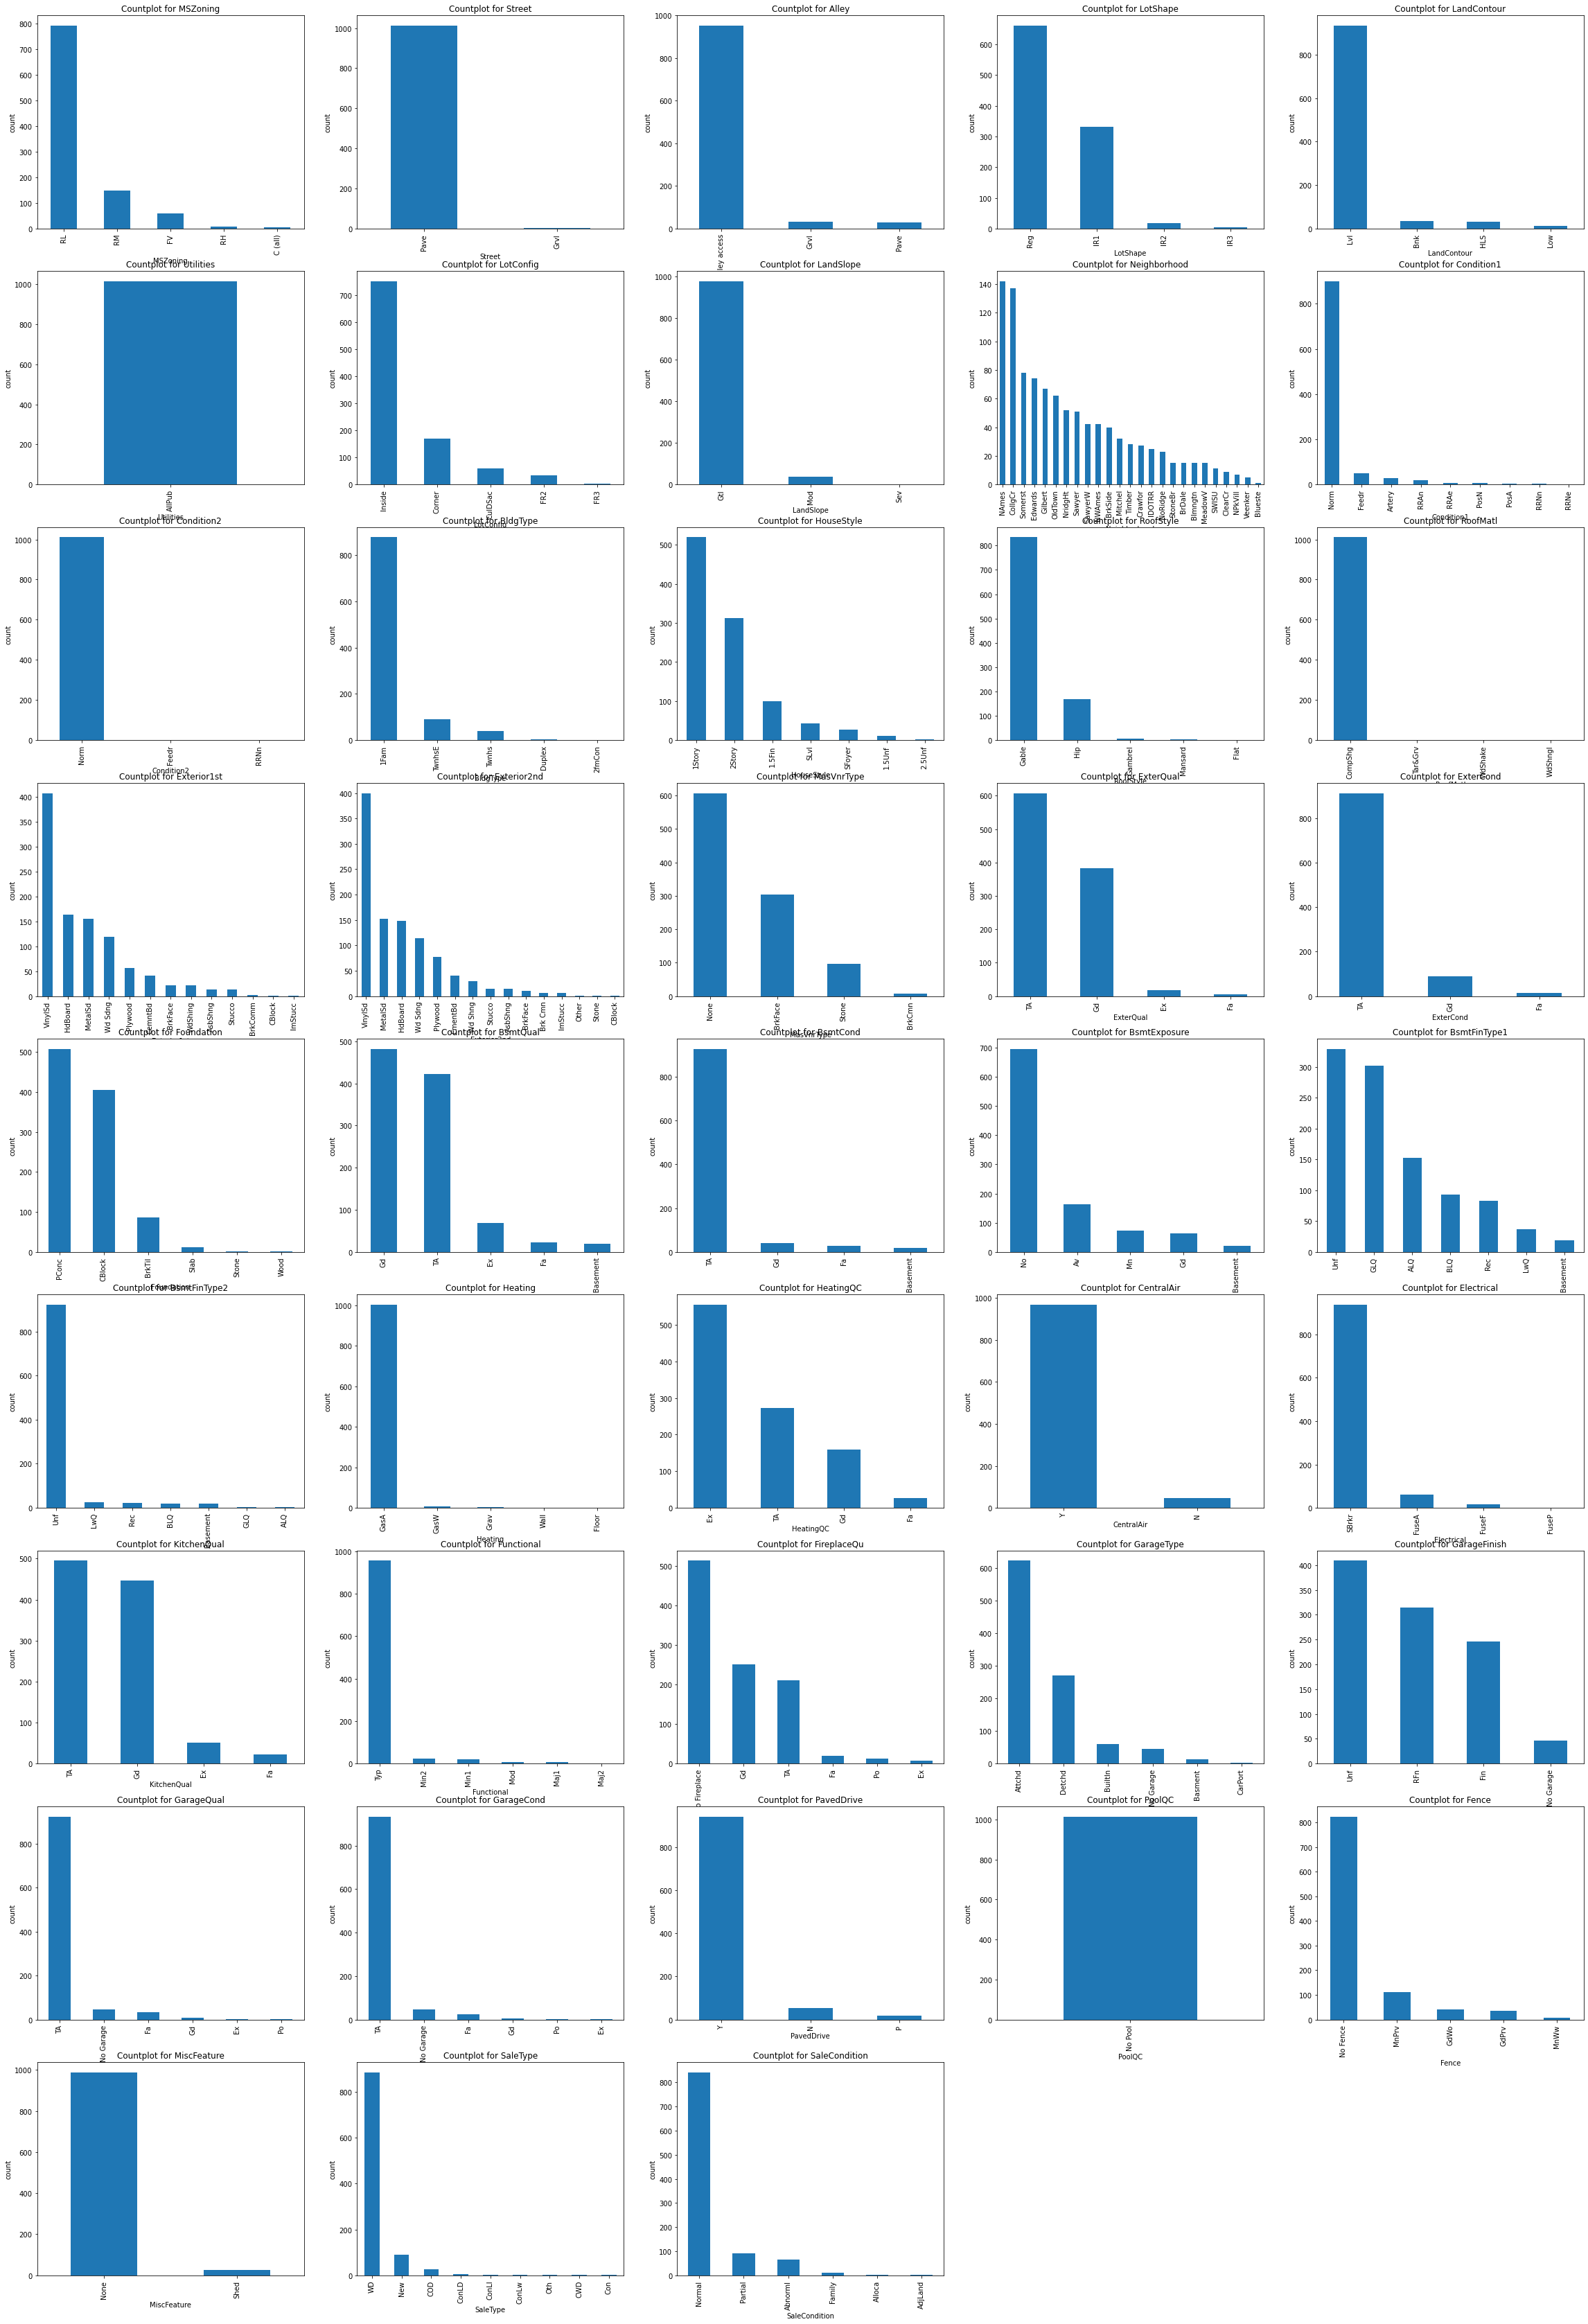

In [24]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(40,60))
x=1
for i in cat:
    plt.subplot(9,5,x)
    train[i].value_counts().plot(kind='bar',xlabel=f'{i}',ylabel='count',title=f'Countplot for {i}')
    x=x+1

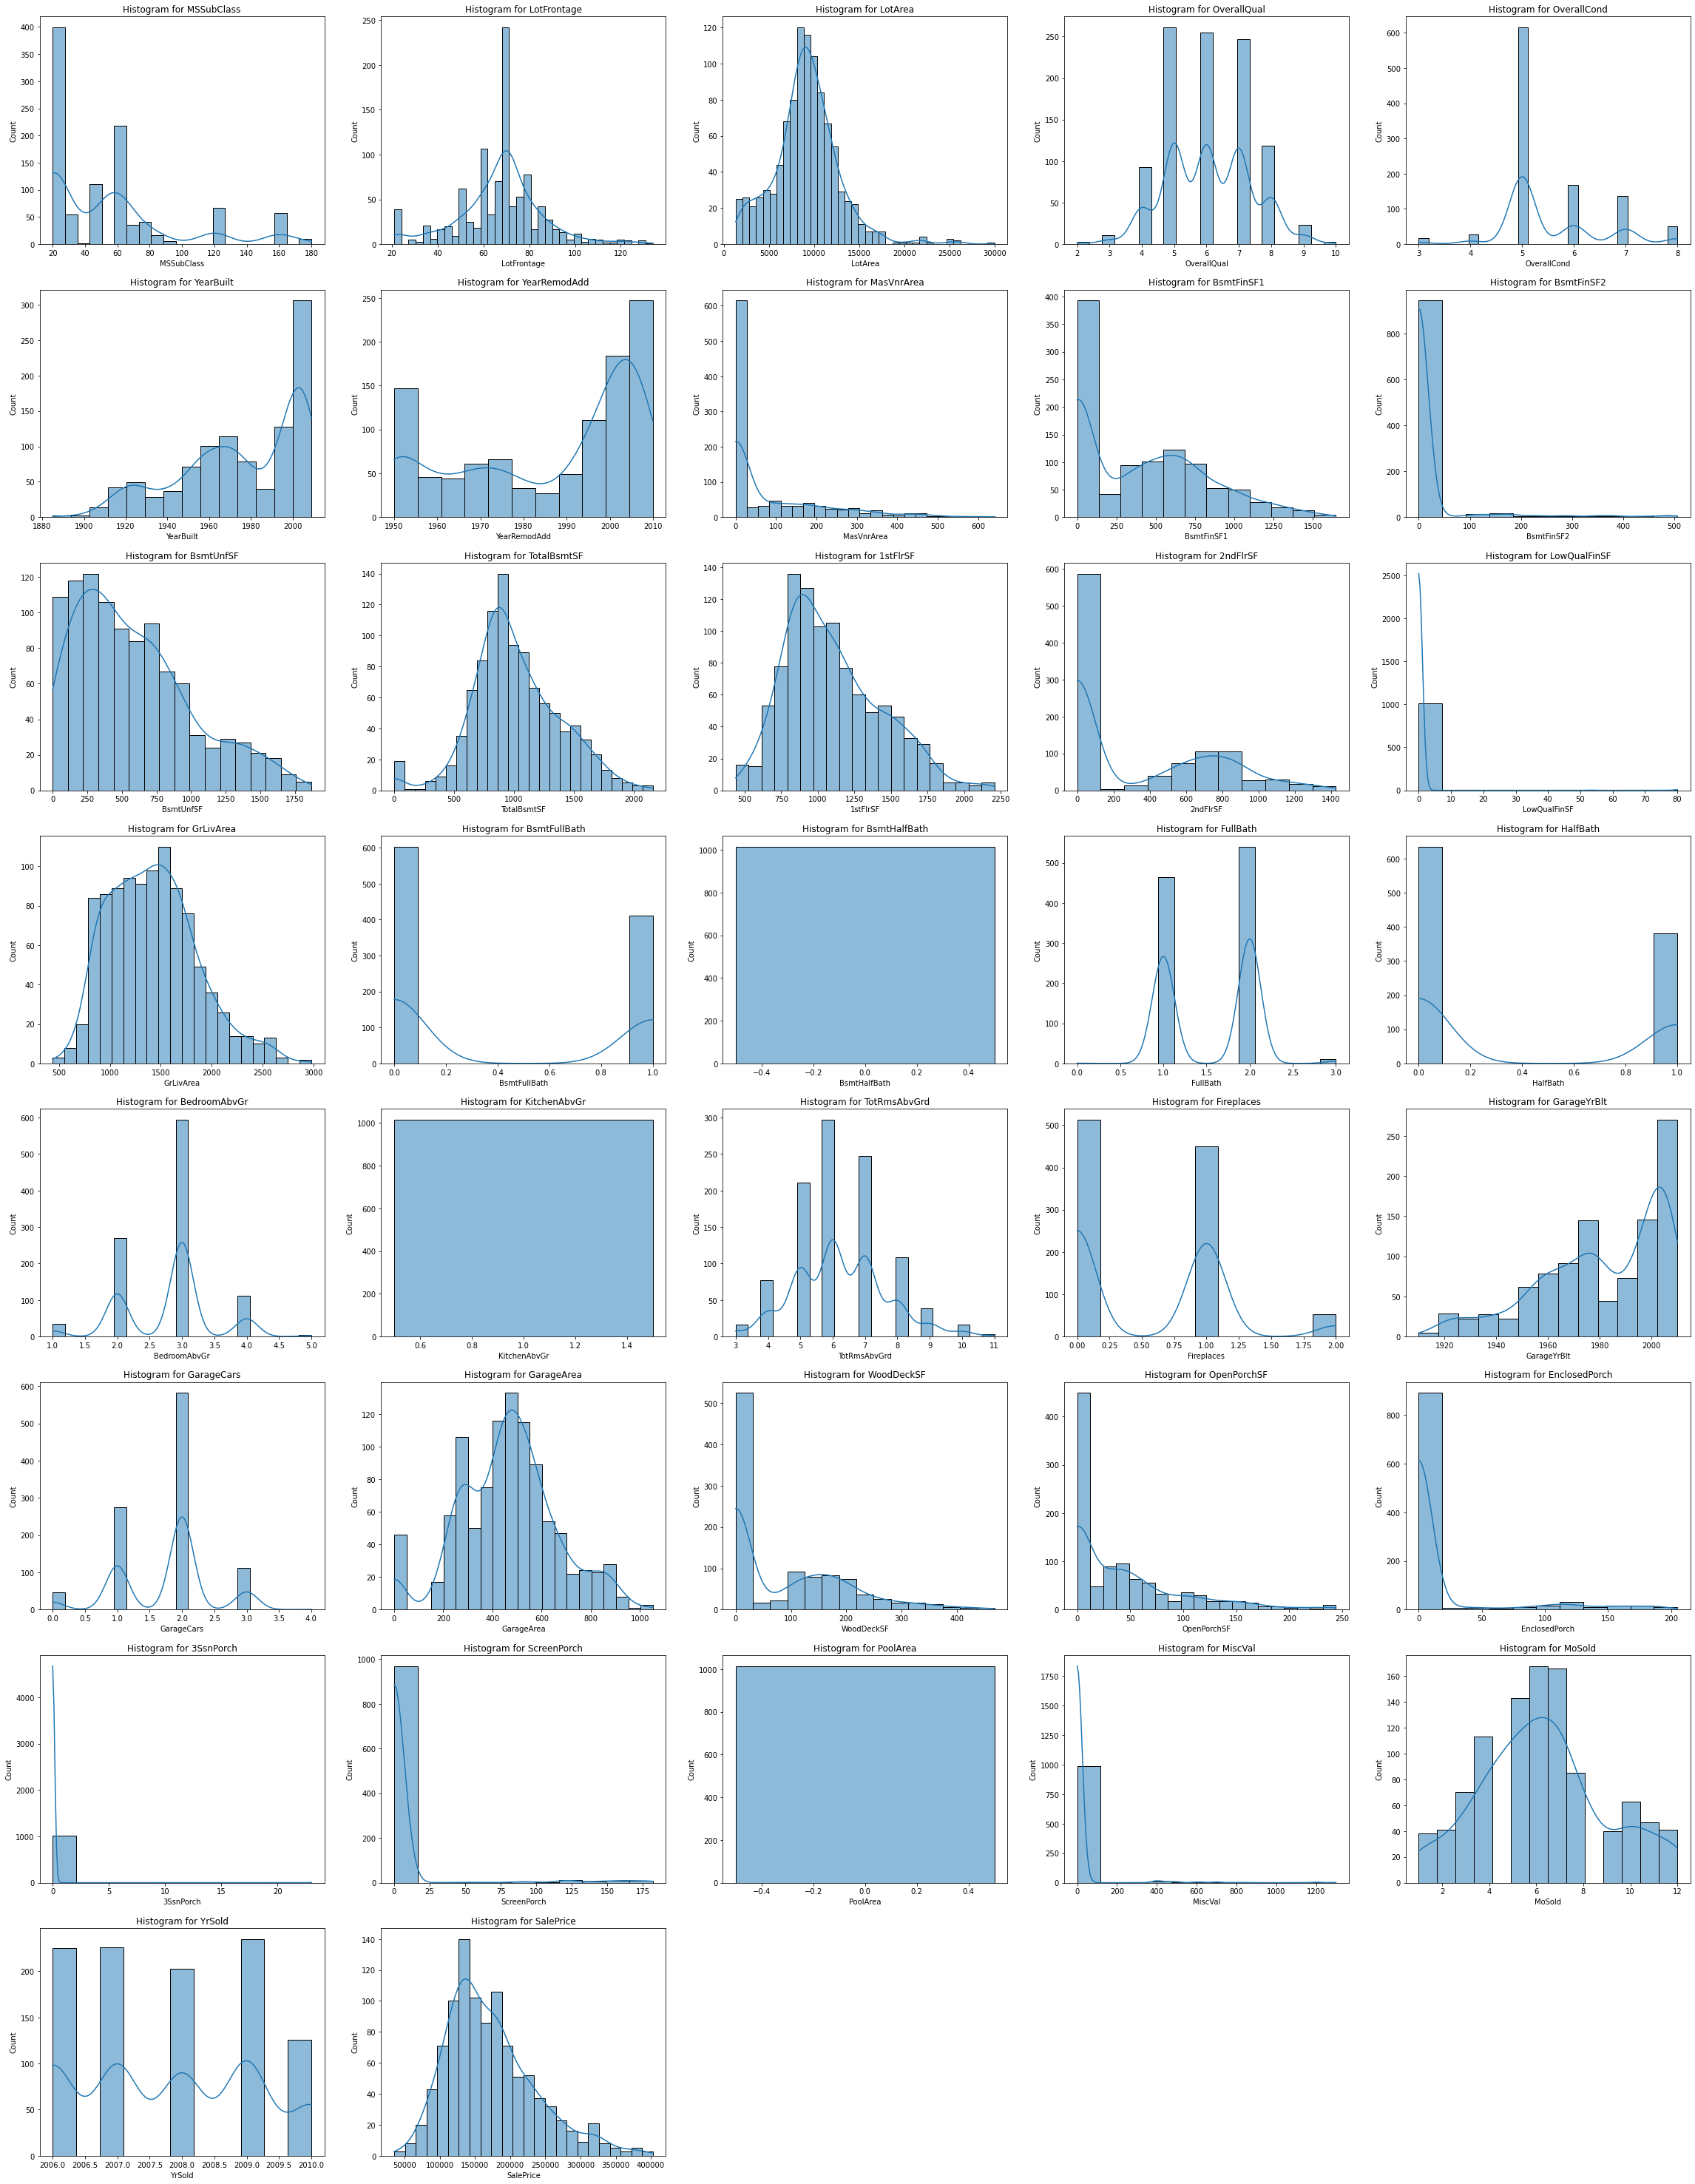

In [25]:
# Plot Histogram for con features
plt.figure(figsize=(40,60))
x=1
for i in con:
    plt.subplot(9,5,x)
    sb.histplot(data=train,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    x=x+1

# Bivariate Analysis
1. Con vs Con - Scatterplot, Correlation Heatmap
2. Cat vs Con - Boxplot

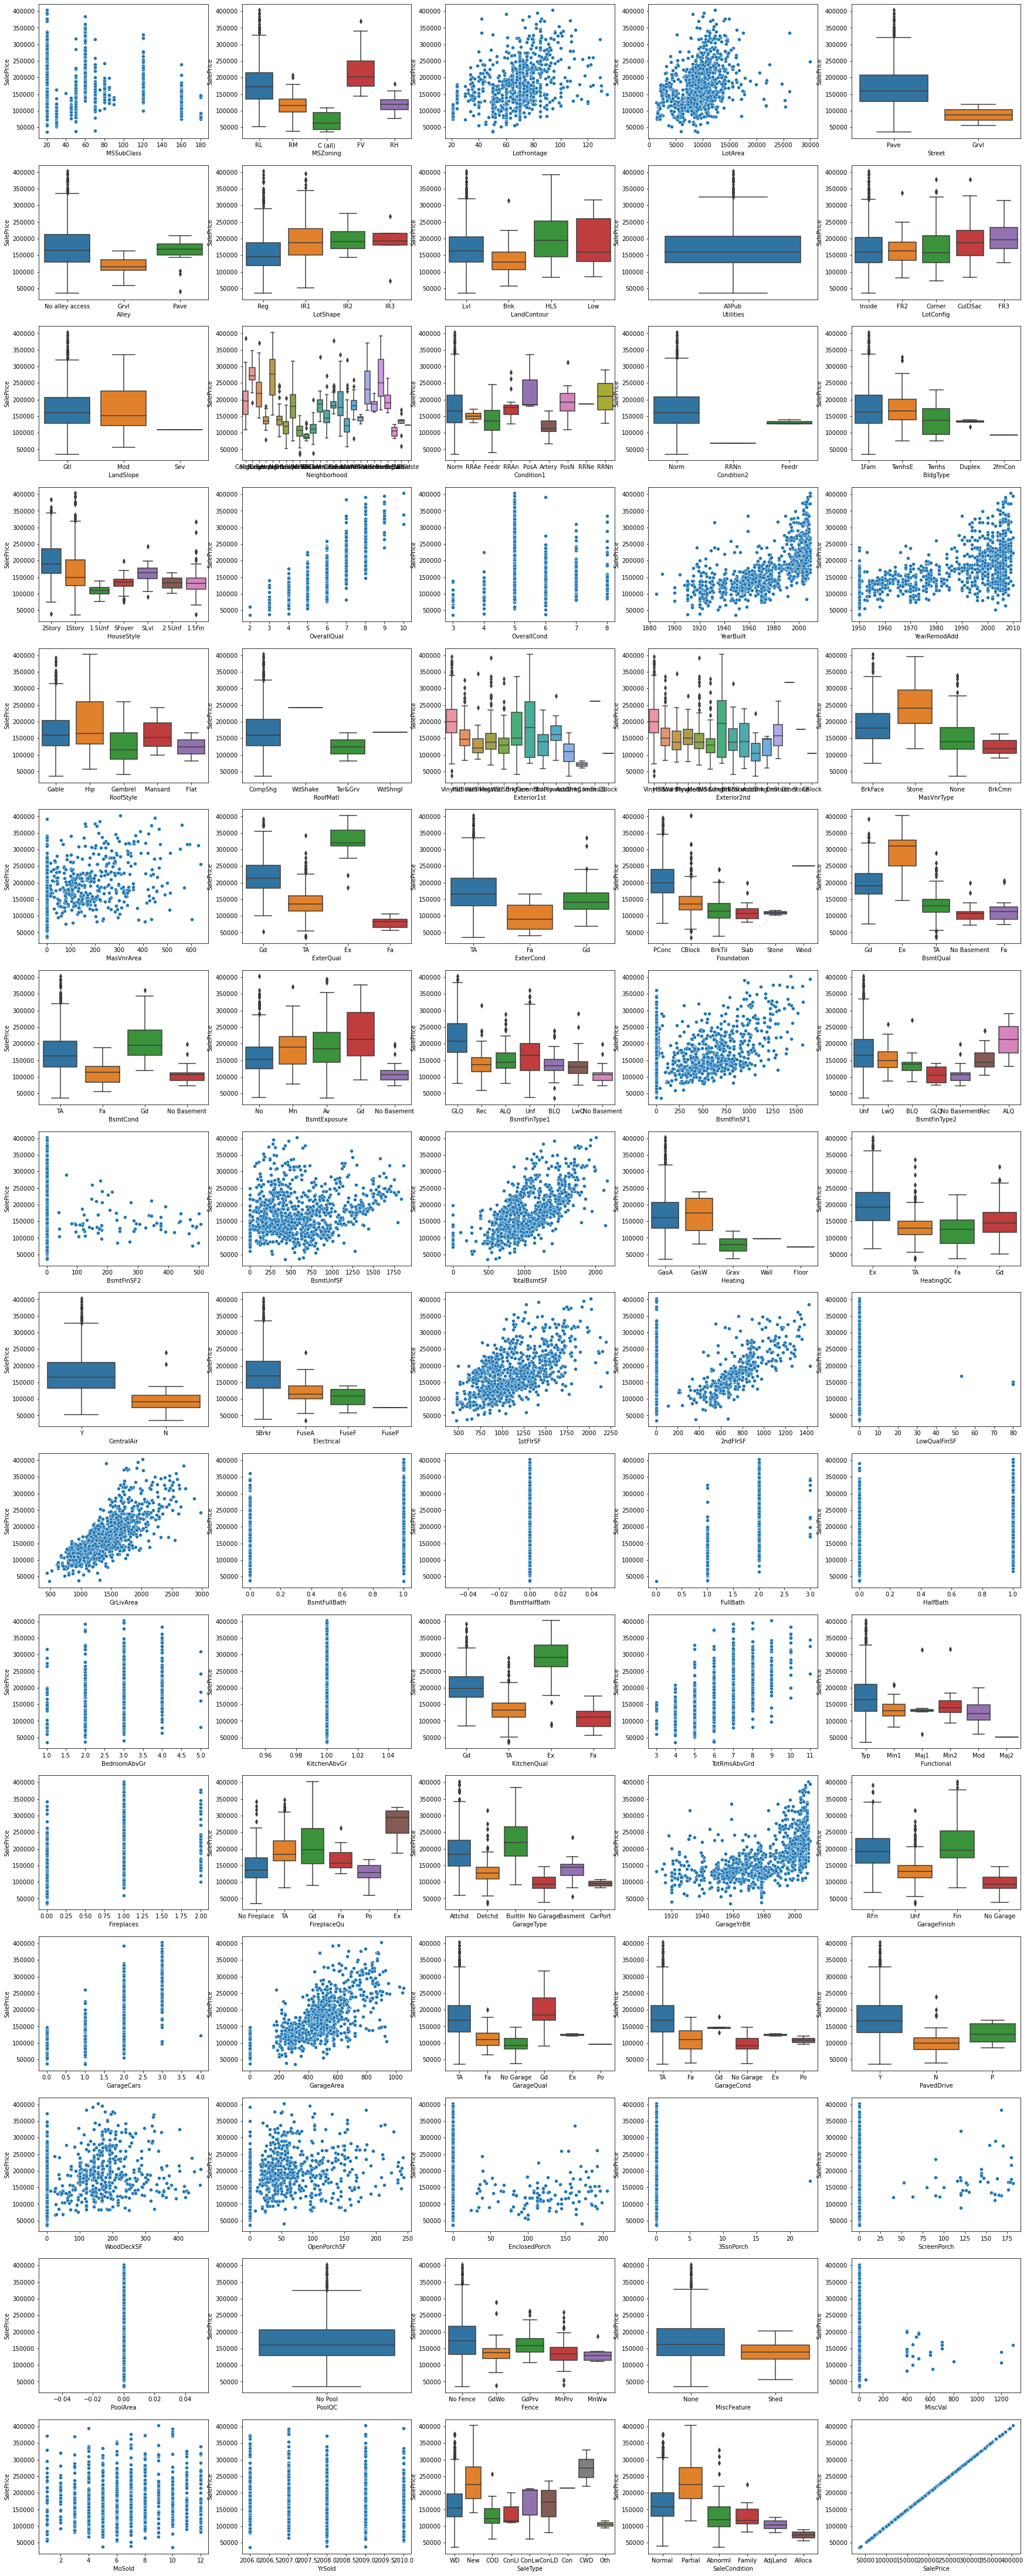

In [26]:
plt.figure(figsize=(30,80))
x=1
for i in train.columns:
    if (train[i].dtypes != "object"):
        plt.subplot(16,5,x)
        sb.scatterplot(train[i],train["SalePrice"])
        x=x+1
    else:
        plt.subplot(16,5,x)
        sb.boxplot(data=train,x=i,y='SalePrice')
        x=x+1

### Correlation Heatmap

In [27]:
train[con].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.515123,-0.495189,0.133864,-0.093637,0.182205,0.135215,0.079053,-0.088829,0.002132,-0.151001,-0.275150,-0.336988,0.338882,0.135430,0.064087,-0.014150,NaN,0.140386,0.275783,-0.180731,NaN,-0.057435,0.010816,0.164694,0.009244,-0.071451,0.009642,0.036305,-0.070120,-0.026408,-0.044288,NaN,-0.056403,-0.026249,-0.011858,-0.037097
LotFrontage,-0.515123,1.000000,0.585254,0.225072,-0.026661,0.152420,0.092562,0.135481,0.153106,-0.014902,0.138262,0.329233,0.387625,0.030286,-0.108315,0.325170,0.052736,NaN,0.180970,0.033053,0.322628,NaN,0.331766,0.233813,0.090154,0.301259,0.344658,0.116453,0.137593,-0.030646,-0.004268,0.040681,NaN,0.028588,0.015436,0.000125,0.386450
LotArea,-0.495189,0.585254,1.000000,0.152209,-0.046554,0.071720,0.028915,0.087288,0.155771,-0.006188,0.092942,0.281027,0.368256,0.101191,-0.069048,0.377963,0.056836,NaN,0.207482,0.077594,0.397120,NaN,0.390803,0.266297,0.038983,0.265237,0.295736,0.155434,0.094900,-0.026221,0.009486,0.056422,NaN,0.043179,0.001385,-0.018849,0.364850
OverallQual,0.133864,0.225072,0.152209,1.000000,-0.195442,0.640335,0.577426,0.388977,0.159035,-0.144207,0.322801,0.524640,0.454096,0.287150,0.026721,0.621254,0.088498,NaN,0.649309,0.246783,0.158768,NaN,0.473326,0.357975,0.567460,0.621167,0.563529,0.247274,0.355960,-0.173149,-0.001742,-0.034565,NaN,-0.061881,0.079260,-0.018551,0.813903
OverallCond,-0.093637,-0.026661,-0.046554,-0.195442,1.000000,-0.426478,-0.033604,-0.138463,-0.001668,0.068581,-0.155661,-0.169567,-0.126174,-0.057623,-0.021474,-0.151755,0.012787,NaN,-0.270802,-0.066287,-0.032842,NaN,-0.100838,-0.065504,-0.360476,-0.229541,-0.185772,-0.048234,-0.104688,0.124255,-0.016629,0.098420,NaN,0.115613,-0.016217,0.060016,-0.158932
YearBuilt,0.182205,0.152420,0.071720,0.640335,-0.426478,1.000000,0.670122,0.311270,0.199240,-0.076259,0.193959,0.432976,0.310828,0.119378,0.041877,0.352317,0.174674,NaN,0.608252,0.245701,0.038113,NaN,0.226675,0.156675,0.834432,0.594432,0.524324,0.252714,0.306713,-0.419243,0.032324,-0.100136,NaN,-0.095868,0.012298,-0.021680,0.632075
YearRemodAdd,0.135215,0.092562,0.028915,0.577426,-0.033604,0.670122,1.000000,0.180548,0.070944,-0.141143,0.231908,0.320799,0.269926,0.161091,0.027004,0.360308,0.121840,NaN,0.536941,0.200164,0.019375,NaN,0.260810,0.100713,0.661209,0.479043,0.409987,0.210206,0.305762,-0.217503,0.030242,-0.051324,NaN,-0.078967,0.010887,0.019097,0.566916
MasVnrArea,0.079053,0.135481,0.087288,0.388977,-0.138463,0.311270,0.180548,1.000000,0.225145,-0.050927,0.082976,0.337359,0.313050,0.096128,-0.039617,0.331092,0.111089,NaN,0.258616,0.138201,0.096329,NaN,0.251669,0.227183,0.246009,0.350439,0.340412,0.179082,0.135606,-0.144886,-0.020030,-0.029725,NaN,-0.050987,0.021431,0.010197,0.418379
BsmtFinSF1,-0.088829,0.153106,0.155771,0.159035,-0.001668,0.199240,0.070944,0.225145,1.000000,0.008457,-0.600750,0.413921,0.357314,-0.188907,-0.063622,0.094519,0.697562,NaN,0.044039,-0.065578,-0.059604,NaN,0.000626,0.178904,0.116152,0.177841,0.237558,0.190490,0.043723,-0.108434,-0.029989,0.042960,NaN,-0.008466,-0.018917,0.050121,0.350999
BsmtFinSF2,0.002132,-0.014902,-0.006188,-0.144207,0.068581,-0.076259,-0.141143,-0.050927,0.008457,1.000000,-0.187098,-0.000542,-0.017894,-0.076932,-0.015340,-0.086860,0.129702,NaN,-0.124976,-0.051743,0.020086,NaN,-0.083741,-0.040415,-0.087395,-0.080891,-0.039233,0.049788,-0.094144,0.001060,-0.007756,0.031758,NaN,-0.015715,-0.009365,0.019422,-0.098253


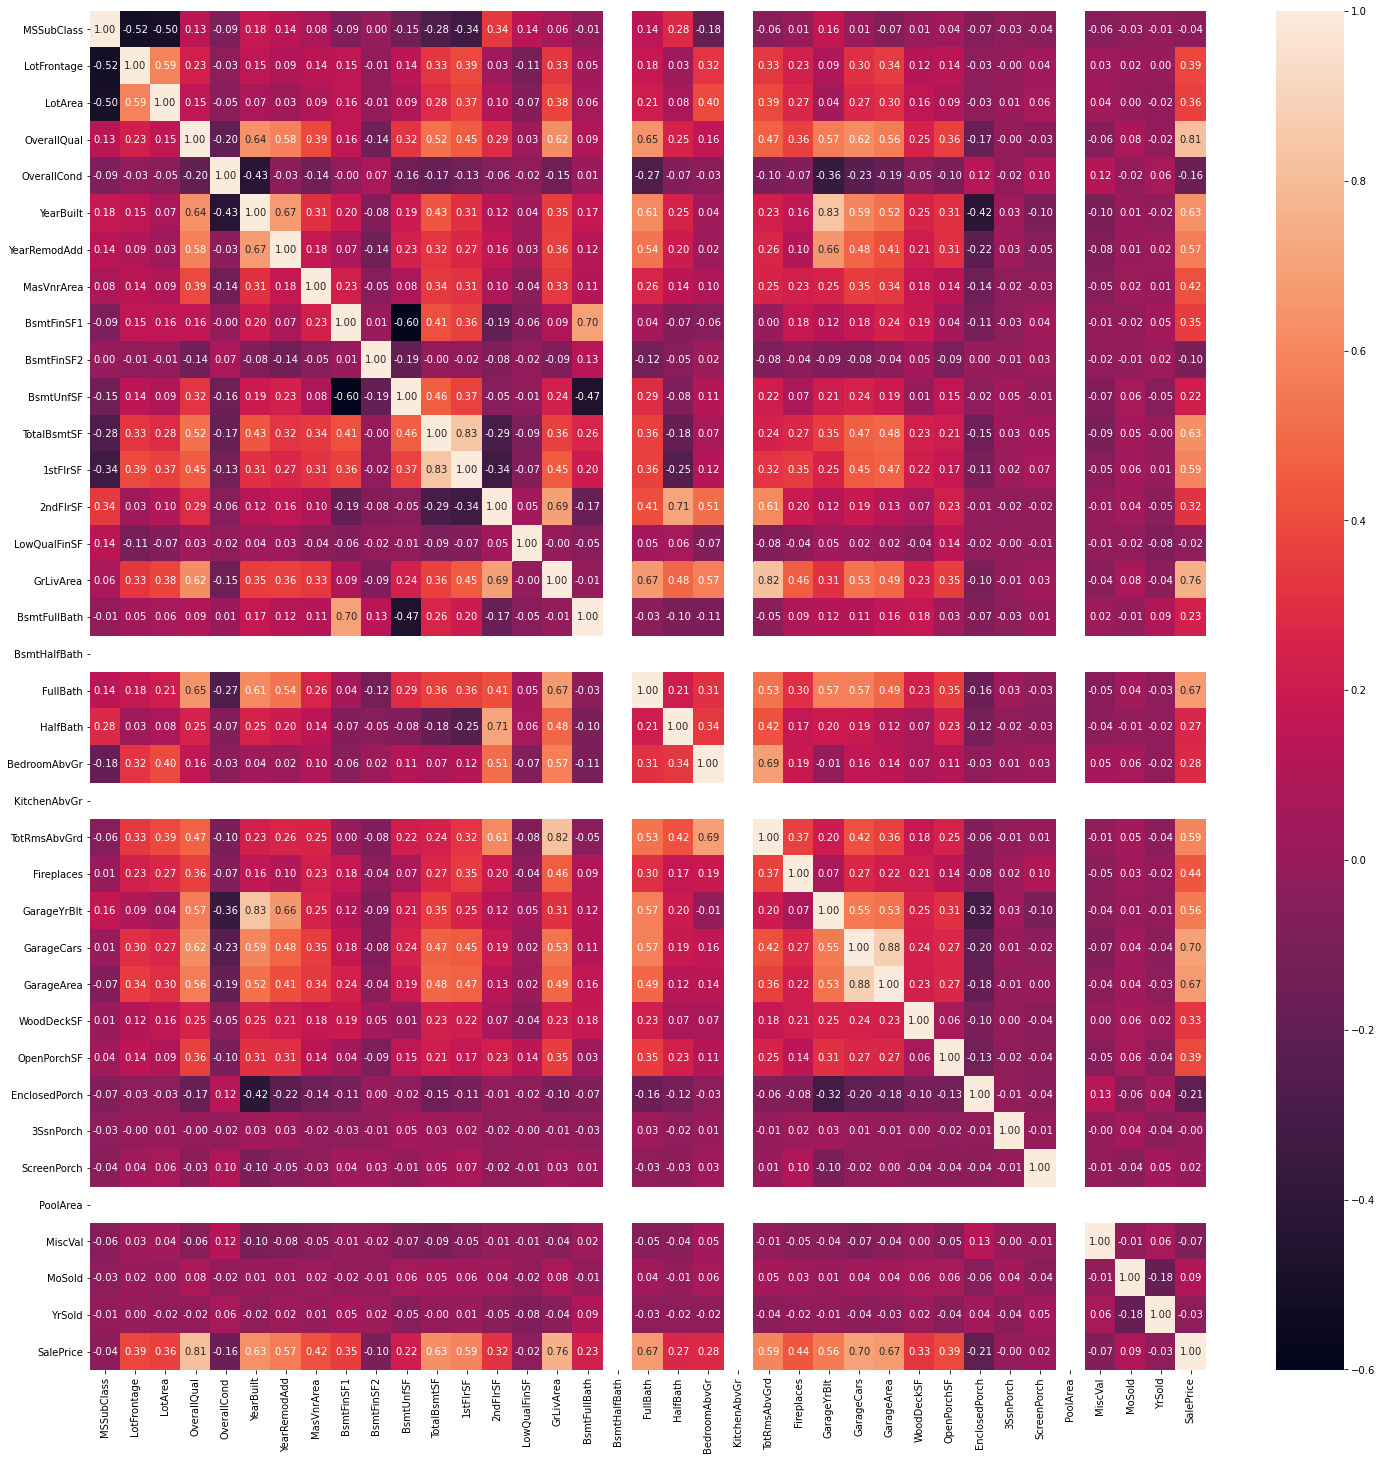

In [28]:
plt.figure(figsize=(25,25))
sb.heatmap(train[con].corr(),annot=True,fmt='.2f')
plt.show()

# Define X & Y

In [29]:
X = train.drop(labels=['SalePrice'],axis=1)
Y = train[['SalePrice']]

# Data Preprocessing

### Cat and Con varibles seperation

In [30]:
con = []
cat = []
for i in X.columns:
    if(X[i].dtypes != "object"):
        con.append(i)
    else:
        cat.append(i)

In [31]:
cat1 = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
        'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [32]:
cat2 = []
for i in cat:
    if i not in cat1:
        cat2.append(i)

In [33]:
cat1 #Order Doesn't Matter

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [34]:
cat2 #Order Matters

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [35]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

## Create sklearn pipeline for feature selection 

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [37]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvailable')),
                            ('ordinal_enc',OrdinalEncoder())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ordinal_enc',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

### Get the preprocessed data

In [38]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.15040939, -0.13591286, -0.18985412, ...,  2.        ,
         8.        ,  4.        ],
       [ 0.15040939,  0.02820168,  0.5809437 , ...,  2.        ,
         8.        ,  4.        ],
       [ 0.15040939,  0.90347923,  1.40955135, ...,  2.        ,
         8.        ,  4.        ],
       ...,
       [-0.84092525, -0.3000274 , -0.45137481, ...,  2.        ,
         8.        ,  4.        ],
       [ 0.15040939, -0.3000274 , -0.33658099, ...,  2.        ,
         8.        ,  4.        ],
       [-0.84092525,  0.95818408,  1.1108672 , ...,  2.        ,
         8.        ,  4.        ]])

In [39]:
cols = pre.get_feature_names_out()
cols

array(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat1__Alley',
       'cat1__BsmtQual', 'cat1__BsmtCond', 'cat1__BsmtExposure',
       'cat1__BsmtFinType1', 'cat1__BsmtFinType2', 'cat1__FireplaceQu',
       'cat1__GarageType', 'cat1__GarageFinish', 'cat1__GarageQual',
       'cat1__G

In [40]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,num__FullBath,num__HalfBath,num__BedroomAbvGr,num__KitchenAbvGr,num__TotRmsAbvGrd,num__Fireplaces,num__GarageYrBlt,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,num__MoSold,num__YrSold,cat1__Alley,cat1__BsmtQual,cat1__BsmtCond,cat1__BsmtExposure,cat1__BsmtFinType1,cat1__BsmtFinType2,cat1__FireplaceQu,cat1__GarageType,cat1__GarageFinish,cat1__GarageQual,cat1__GarageCond,cat1__PoolQC,cat1__Fence,cat1__MiscFeature,cat2__MSZoning,cat2__Street,cat2__LotShape,cat2__LandContour,cat2__Utilities,cat2__LotConfig,cat2__LandSlope,cat2__Neighborhood,cat2__Condition1,cat2__Condition2,cat2__BldgType,cat2__HouseStyle,cat2__RoofStyle,cat2__RoofMatl,cat2__Exterior1st,cat2__Exterior2nd,cat2__MasVnrType,cat2__ExterQual,cat2__ExterCond,cat2__Foundation,cat2__Heating,cat2__HeatingQC,cat2__CentralAir,cat2__Electrical,cat2__KitchenQual,cat2__Functional,cat2__PavedDrive,cat2__SaleType,cat2__SaleCondition
0,0.150409,-0.135913,-0.189854,0.705529,-0.529518,0.960424,0.818268,0.871532,0.725051,-0.246977,-1.019913,-0.436066,-0.739360,1.304998,-0.062111,0.669174,1.20979,0.0,0.866047,1.292692,0.306264,0.0,1.261037,-0.922112,0.931328,0.352882,0.423406,-0.819126,0.355446,-0.345325,-0.031404,-0.207884,0.0,-0.145801,-1.586507,0.138684,1.0,2.0,3.0,3.0,2.0,6.0,3.0,0.0,2.0,5.0,5.0,0.0,4.0,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,1.0,0.0,4.0,1.0,0.0,10.0,12.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,2.0,5.0,2.0,8.0,4.0
1,0.150409,0.028202,0.580944,0.705529,-0.529518,0.891548,0.770023,0.609703,0.179922,-0.246977,-0.349135,-0.259298,-0.545149,1.334481,-0.062111,0.846250,1.20979,0.0,0.866047,1.292692,0.306264,0.0,-0.175498,0.767317,0.848026,0.352882,0.727773,-0.819126,-0.000831,-0.345325,-0.031404,-0.207884,0.0,-0.145801,1.025201,0.138684,1.0,2.0,3.0,2.0,2.0,6.0,5.0,0.0,2.0,5.0,5.0,0.0,4.0,0.0,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,1.0,0.0,4.0,1.0,0.0,10.0,12.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,2.0,5.0,2.0,8.0,4.0
2,0.150409,0.903479,1.409551,1.466540,-0.529518,0.857110,0.673532,2.057465,0.598680,-0.246977,-0.216869,0.362150,0.137625,1.793936,-0.062111,1.806194,1.20979,0.0,0.866047,1.292692,1.738792,0.0,1.979304,0.767317,0.806375,1.763020,1.884369,0.974222,0.786729,-0.345325,-0.031404,-0.207884,0.0,-0.145801,2.144505,0.138684,1.0,2.0,3.0,0.0,2.0,6.0,5.0,0.0,2.0,5.0,5.0,0.0,4.0,0.0,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,1.0,0.0,4.0,1.0,0.0,10.0,12.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,2.0,5.0,2.0,8.0,4.0
3,-0.840925,0.411136,0.259961,1.466540,-0.529518,0.994862,0.914759,0.794524,2.367871,-0.246977,-0.625476,1.856388,1.803594,-0.793259,-0.062111,0.631894,1.20979,0.0,0.866047,-0.773579,0.306264,0.0,0.542770,0.767317,0.972979,0.352882,0.869811,1.562665,0.280440,-0.345325,-0.031404,-0.207884,0.0,-0.145801,0.652100,-0.606100,1.0,0.0,3.0,0.0,2.0,6.0,2.0,0.0,2.0,5.0,5.0,0.0,4.0,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,1.0,0.0,2.0,1.0,0.0,10.0,12.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,2.0,5.0,2.0,8.0,4.0
4,-0.840925,0.137611,0.567179,-0.816494,-0.529518,-0.348212,-1.015052,-0.637837,1.220622,-0.246977,-1.057703,0.072141,-0.181003,-0.793259,-0.062111,-0.891899,1.20979,0.0,-1.061668,-0.773579,0.306264,0.0,-0.893765,-0.922112,-0.651408,-1.057257,-0.408532,-0.819126,-0.788392,-0.345325,-0.031404,-0.207884,0.0,-0.145801,-1.586507,0.138684,1.0,4.0,3.0,3.0,5.0,6.0,3.0,4.0,3.0,5.0,5.0,0.0,4.0,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,1.0,0.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,2.0,1.0,1.0,0.0,1.0,3.0,3.0,5.0,2.0,8.0,4.0


In [41]:
X_pre.isna().sum()

num__MSSubClass        0
num__LotFrontage       0
num__LotArea           0
num__OverallQual       0
num__OverallCond       0
                      ..
cat2__KitchenQual      0
cat2__Functional       0
cat2__PavedDrive       0
cat2__SaleType         0
cat2__SaleCondition    0
Length: 79, dtype: int64

# Feature Selection

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [43]:
model = LinearRegression()
sel = SequentialFeatureSelector(model,direction='backward',n_jobs=-1)
sel_features = sel.fit_transform(X_pre,Y)
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__KitchenAbvGr',
       'num__Fireplaces', 'num__GarageArea', 'num__OpenPorchSF',
       'num__MoSold', 'cat1__BsmtQual', 'cat1__BsmtExposure',
       'cat1__BsmtFinType2', 'cat1__FireplaceQu', 'cat2__MSZoning',
       'cat2__LandContour', 'cat2__LotConfig', 'cat2__Condition1',
       'cat2__Condition2', 'cat2__BldgType', 'cat2__RoofStyle',
       'cat2__Exterior1st', 'cat2__MasVnrType', 'cat2__ExterQual',
       'cat2__ExterCond', 'cat2__Heating', 'cat2__HeatingQC',
       'cat2__KitchenQual', 'cat2__Functional', 'cat2__SaleCondition'],
      dtype=object)

In [44]:
len(imp_cols)

39

In [45]:
'num__MSSubClass'.split('__')[1]

'MSSubClass'

In [46]:
sel_cols = []
for i in imp_cols:
    s = i.split('__')[1]
    sel_cols.append(s)

In [47]:
sel_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'OpenPorchSF',
 'MoSold',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType2',
 'FireplaceQu',
 'MSZoning',
 'LandContour',
 'LotConfig',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Heating',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'SaleCondition']

In [48]:
X_sel = X[sel_cols]
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,KitchenAbvGr,Fireplaces,GarageArea,OpenPorchSF,MoSold,BsmtQual,BsmtExposure,BsmtFinType2,FireplaceQu,MSZoning,LandContour,LotConfig,Condition1,Condition2,BldgType,RoofStyle,Exterior1st,MasVnrType,ExterQual,ExterCond,Heating,HeatingQC,KitchenQual,Functional,SaleCondition
0,60,8450,7,5,2003,196.0,706,0,150,856,856,854,1710,1,1,0,548,61,2,Gd,No,Unf,No Fireplace,RL,Lvl,Inside,Norm,Norm,1Fam,Gable,VinylSd,BrkFace,Gd,TA,GasA,Ex,Gd,Typ,Normal
1,60,11250,7,5,2001,162.0,486,0,434,920,920,866,1786,1,1,1,608,42,9,Gd,Mn,Unf,TA,RL,Lvl,Inside,Norm,Norm,1Fam,Gable,VinylSd,BrkFace,Gd,TA,GasA,Ex,Gd,Typ,Normal
2,60,14260,8,5,2000,350.0,655,0,490,1145,1145,1053,2198,1,1,1,836,84,12,Gd,Av,Unf,TA,RL,Lvl,FR2,Norm,Norm,1Fam,Gable,VinylSd,BrkFace,Gd,TA,GasA,Ex,Gd,Typ,Normal
3,20,10084,8,5,2004,186.0,1369,0,317,1686,1694,0,1694,1,1,1,636,57,8,Ex,Av,Unf,Gd,RL,Lvl,Inside,Norm,Norm,1Fam,Gable,VinylSd,Stone,Gd,TA,GasA,Ex,Gd,Typ,Normal
4,20,11200,5,5,1965,0.0,906,0,134,1040,1040,0,1040,1,1,0,384,0,2,TA,No,Unf,No Fireplace,RL,Lvl,Inside,Norm,Norm,1Fam,Hip,HdBoard,None,TA,TA,GasA,Ex,TA,Typ,Normal


# Build final Preprocessing pipeline

In [49]:
from AG_lab import catconsep
cat_sel, con_sel = catconsep(X_sel)

In [50]:
cat1_sel = []
cat2_sel = []
for i in cat_sel:
    if i in cat1:
        cat1_sel.append(i)
    else:
        cat2_sel.append(i)

In [51]:
cat1_sel

['BsmtQual', 'BsmtExposure', 'BsmtFinType2', 'FireplaceQu']

In [52]:
cat2_sel

['MSZoning',
 'LandContour',
 'LotConfig',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Heating',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'SaleCondition']

In [53]:
from sklearn.preprocessing import OneHotEncoder

num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvailable')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre1 = ColumnTransformer([('num',num_pipe,con_sel),
                          ('cat1',cat_pipe1,cat1_sel),
                          ('cat2',cat_pipe2,cat2_sel)])

In [54]:
# Preprocess the data
X_sel_pre = pre1.fit_transform(X_sel)
X_sel_pre

array([[ 0.15040939, -0.18985412,  0.70552854, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15040939,  0.5809437 ,  0.70552854, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15040939,  1.40955135,  1.46653967, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.84092525, -0.45137481,  0.70552854, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15040939, -0.33658099, -0.05548258, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84092525,  1.1108672 , -0.05548258, ...,  0.        ,
         1.        ,  0.        ]])

In [55]:
final_cols = pre1.get_feature_names_out()
final_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__KitchenAbvGr',
       'num__Fireplaces', 'num__GarageArea', 'num__OpenPorchSF',
       'num__MoSold', 'cat1__BsmtQual_Ex', 'cat1__BsmtQual_Fa',
       'cat1__BsmtQual_Gd', 'cat1__BsmtQual_No Basement',
       'cat1__BsmtQual_TA', 'cat1__BsmtExposure_Av',
       'cat1__BsmtExposure_Gd', 'cat1__BsmtExposure_Mn',
       'cat1__BsmtExposure_No', 'cat1__BsmtExposure_No Basement',
       'cat1__BsmtFinType2_ALQ', 'cat1__BsmtFinType2_BLQ',
       'cat1__BsmtFinType2_GLQ', 'cat1__BsmtFinType2_LwQ',
       'cat1__BsmtFinType2_No Basement', 'cat1__BsmtFinType2_Rec',
       'cat1__BsmtFinType2_Unf', 'cat1__FireplaceQu_Ex',
       'cat1__FireplaceQu_Fa', 'cat1__FireplaceQu_Gd',
       'cat1__Fireplace

In [56]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=final_cols)
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,num__Fireplaces,num__GarageArea,num__OpenPorchSF,num__MoSold,cat1__BsmtQual_Ex,cat1__BsmtQual_Fa,cat1__BsmtQual_Gd,cat1__BsmtQual_No Basement,cat1__BsmtQual_TA,cat1__BsmtExposure_Av,cat1__BsmtExposure_Gd,cat1__BsmtExposure_Mn,cat1__BsmtExposure_No,cat1__BsmtExposure_No Basement,cat1__BsmtFinType2_ALQ,cat1__BsmtFinType2_BLQ,cat1__BsmtFinType2_GLQ,cat1__BsmtFinType2_LwQ,cat1__BsmtFinType2_No Basement,cat1__BsmtFinType2_Rec,cat1__BsmtFinType2_Unf,cat1__FireplaceQu_Ex,cat1__FireplaceQu_Fa,cat1__FireplaceQu_Gd,cat1__FireplaceQu_No Fireplace,cat1__FireplaceQu_Po,cat1__FireplaceQu_TA,cat2__MSZoning_C (all),cat2__MSZoning_FV,cat2__MSZoning_RH,cat2__MSZoning_RL,cat2__MSZoning_RM,cat2__LandContour_Bnk,cat2__LandContour_HLS,cat2__LandContour_Low,...,cat2__RoofStyle_Mansard,cat2__Exterior1st_AsbShng,cat2__Exterior1st_BrkComm,cat2__Exterior1st_BrkFace,cat2__Exterior1st_CBlock,cat2__Exterior1st_CemntBd,cat2__Exterior1st_HdBoard,cat2__Exterior1st_ImStucc,cat2__Exterior1st_MetalSd,cat2__Exterior1st_Plywood,cat2__Exterior1st_Stucco,cat2__Exterior1st_VinylSd,cat2__Exterior1st_Wd Sdng,cat2__Exterior1st_WdShing,cat2__MasVnrType_BrkCmn,cat2__MasVnrType_BrkFace,cat2__MasVnrType_None,cat2__MasVnrType_Stone,cat2__ExterQual_Ex,cat2__ExterQual_Fa,cat2__ExterQual_Gd,cat2__ExterQual_TA,cat2__ExterCond_Fa,cat2__ExterCond_Gd,cat2__ExterCond_TA,cat2__Heating_Floor,cat2__Heating_GasA,cat2__Heating_GasW,cat2__Heating_Grav,cat2__Heating_Wall,cat2__HeatingQC_Ex,cat2__HeatingQC_Fa,cat2__HeatingQC_Gd,cat2__HeatingQC_TA,cat2__KitchenQual_Ex,cat2__KitchenQual_Fa,cat2__KitchenQual_Gd,cat2__KitchenQual_TA,cat2__Functional_Maj1,cat2__Functional_Maj2,cat2__Functional_Min1,cat2__Functional_Min2,cat2__Functional_Mod,cat2__Functional_Typ,cat2__SaleCondition_Abnorml,cat2__SaleCondition_AdjLand,cat2__SaleCondition_Alloca,cat2__SaleCondition_Family,cat2__SaleCondition_Normal,cat2__SaleCondition_Partial
0,0.150409,-0.189854,0.705529,-0.529518,0.960424,0.871532,0.725051,-0.246977,-1.019913,-0.436066,-0.739360,1.304998,0.669174,1.20979,0.0,-0.922112,0.423406,0.355446,-1.586507,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.150409,0.580944,0.705529,-0.529518,0.891548,0.609703,0.179922,-0.246977,-0.349135,-0.259298,-0.545149,1.334481,0.846250,1.20979,0.0,0.767317,0.727773,-0.000831,1.025201,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.150409,1.409551,1.466540,-0.529518,0.857110,2.057465,0.598680,-0.246977,-0.216869,0.362150,0.137625,1.793936,1.806194,1.20979,0.0,0.767317,1.884369,0.786729,2.144505,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.840925,0.259961,1.466540,-0.529518,0.994862,0.794524,2.367871,-0.246977,-0.625476,1.856388,1.803594,-0.793259,0.631894,1.20979,0.0,0.767317,0.869811,0.280440,0.652100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0

# Dividing Data in training & testing set (Random state: 21) 0.8,0.2

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=21)

In [58]:
xtrain.shape

(812, 127)

In [59]:
xtest.shape

(203, 127)

# Check base model performance

In [60]:
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [61]:
model1.score(xtrain,ytrain)

0.927664024692337

In [62]:
model1.score(xtest,ytest)

-1.0978151355992353e+19

In [63]:
model1.intercept_

array([2.84521846e+15])

In [64]:
#model1.coef_

In [65]:
def evaluate_model(xtrain,ytrain,xtest,ytest,model1):
    tr_pred = model1.predict(xtrain)
    ts_pred = model1.predict(xtest)

    from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
    tr_mse = mean_squared_error(ytrain, tr_pred)
    ts_mse = mean_squared_error(ytest, ts_pred)
    tr_mae = mean_absolute_error(ytrain, tr_pred)
    ts_mae = mean_absolute_error(ytest, ts_pred)
    tr_r2 = r2_score(ytrain, tr_pred)
    ts_r2 = r2_score(ytest, ts_pred)

    print(f'Training Results:')
    print(f'MSE : {tr_mse:.4f}')
    print(f'MAE : {tr_mae:.4f}')
    print(f'R2 : {tr_r2:.4f}')
    print('------------------------------------')
    print(f'Testing Results:')
    print(f'MSE  : {ts_mse:.4f}')
    print(f'MAE : {ts_mae:.4f}')
    print(f'R2 : {ts_r2:.4f}')

In [66]:
evaluate_model(xtrain,ytrain,xtest,ytest,model1)

Training Results:
MSE : 284429437.5320
MAE : 12106.2217
R2 : 0.9277
------------------------------------
Testing Results:
MSE  : 48298127285686980140500779008.0000
MAE : 28768313138844.0898
R2 : -10978151355992352768.0000


# Regularisation

# Ridge or L2 Regularisation with Hyperparmeter tuning

In [67]:
import numpy as np
alphas = np.arange(30,50,0.1)
print(alphas)

[30.  30.1 30.2 30.3 30.4 30.5 30.6 30.7 30.8 30.9 31.  31.1 31.2 31.3
 31.4 31.5 31.6 31.7 31.8 31.9 32.  32.1 32.2 32.3 32.4 32.5 32.6 32.7
 32.8 32.9 33.  33.1 33.2 33.3 33.4 33.5 33.6 33.7 33.8 33.9 34.  34.1
 34.2 34.3 34.4 34.5 34.6 34.7 34.8 34.9 35.  35.1 35.2 35.3 35.4 35.5
 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3 36.4 36.5 36.6 36.7 36.8 36.9
 37.  37.1 37.2 37.3 37.4 37.5 37.6 37.7 37.8 37.9 38.  38.1 38.2 38.3
 38.4 38.5 38.6 38.7 38.8 38.9 39.  39.1 39.2 39.3 39.4 39.5 39.6 39.7
 39.8 39.9 40.  40.1 40.2 40.3 40.4 40.5 40.6 40.7 40.8 40.9 41.  41.1
 41.2 41.3 41.4 41.5 41.6 41.7 41.8 41.9 42.  42.1 42.2 42.3 42.4 42.5
 42.6 42.7 42.8 42.9 43.  43.1 43.2 43.3 43.4 43.5 43.6 43.7 43.8 43.9
 44.  44.1 44.2 44.3 44.4 44.5 44.6 44.7 44.8 44.9 45.  45.1 45.2 45.3
 45.4 45.5 45.6 45.7 45.8 45.9 46.  46.1 46.2 46.3 46.4 46.5 46.6 46.7
 46.8 46.9 47.  47.1 47.2 47.3 47.4 47.5 47.6 47.7 47.8 47.9 48.  48.1
 48.2 48.3 48.4 48.5 48.6 48.7 48.8 48.9 49.  49.1 49.2 49.3 49.4 49.5
 49.6 

In [68]:
params = {'alpha':alphas}

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
model = Ridge()
gscv = GridSearchCV(model,param_grid=params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([30. , 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. ,
       31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1,
       32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33. , 33.1, 33.2,
       33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3,
       34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4,
       35.5, 35....
       43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. , 44.1, 44.2,
       44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1, 45.2, 45.3,
       45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2, 46.3, 46.4,
       46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2, 47.3, 47.4, 47.5,
       47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3, 48.4, 48.5, 48.6,
       48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7,
       49.8, 49.9])},
             scoring='neg_mean_squared_error')

In [70]:
gscv.best_params_

{'alpha': 30.0}

In [71]:
gscv.best_score_

-368650172.4543546

In [72]:
best_ridge_model = gscv.best_estimator_
best_ridge_model

Ridge(alpha=30.0)

In [73]:
best_ridge_model.score(xtrain,ytrain)

0.9191851510655424

In [74]:
best_ridge_model.score(xtest,ytest)

0.9253451000221806

In [75]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_ridge_model)

Training Results:
MSE : 317768882.3424
MAE : 12763.7888
R2 : 0.9192
------------------------------------
Testing Results:
MSE  : 328442535.0595
MAE : 12918.4878
R2 : 0.9253


## Lasso Model Hyperparameter Tuning (L1 Regularisation)

In [76]:
from sklearn.linear_model import Lasso
params = {'alpha':np.arange(190,205,0.1)}

In [77]:
model = Lasso()
gscv2 = GridSearchCV(model,param_grid=params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
gscv2.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([190. , 190.1, 190.2, 190.3, 190.4, 190.5, 190.6, 190.7, 190.8,
       190.9, 191. , 191.1, 191.2, 191.3, 191.4, 191.5, 191.6, 191.7,
       191.8, 191.9, 192. , 192.1, 192.2, 192.3, 192.4, 192.5, 192.6,
       192.7, 192.8, 192.9, 193. , 193.1, 193.2, 193.3, 193.4, 193.5,
       193.6, 193.7, 193.8, 193.9, 194. , 194.1, 194.2, 194.3, 194.4,
       194.5, 194.6,...
       199. , 199.1, 199.2, 199.3, 199.4, 199.5, 199.6, 199.7, 199.8,
       199.9, 200. , 200.1, 200.2, 200.3, 200.4, 200.5, 200.6, 200.7,
       200.8, 200.9, 201. , 201.1, 201.2, 201.3, 201.4, 201.5, 201.6,
       201.7, 201.8, 201.9, 202. , 202.1, 202.2, 202.3, 202.4, 202.5,
       202.6, 202.7, 202.8, 202.9, 203. , 203.1, 203.2, 203.3, 203.4,
       203.5, 203.6, 203.7, 203.8, 203.9, 204. , 204.1, 204.2, 204.3,
       204.4, 204.5, 204.6, 204.7, 204.8, 204.9])},
             scoring='neg_mean_squared_error')

In [78]:
gscv2.best_params_

{'alpha': 190.0}

In [79]:
gscv2.best_score_

-364407691.0691539

In [80]:
best_lasso_model = gscv2.best_estimator_
best_lasso_model

Lasso(alpha=190.0)

In [81]:
best_lasso_model.score(xtrain,ytrain)

0.9180957080884979

In [82]:
best_lasso_model.score(xtest,ytest)

0.9215176157025003

In [83]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_lasso_model)

Training Results:
MSE : 322052638.1343
MAE : 12947.6923
R2 : 0.9181
------------------------------------
Testing Results:
MSE  : 345281465.3002
MAE : 13515.6775
R2 : 0.9215


# Predictions for train and test with best ridge model 

In [84]:
ypred_tr = best_ridge_model.predict(xtrain)
ypred_ts = best_ridge_model.predict(xtest)

In [85]:
ypred_tr[0:5]

array([[139082.50793997],
       [189795.50929154],
       [126865.26057851],
       [144326.41338981],
       [181456.32345557]])

In [86]:
ytrain.head()

,SalePrice
383,141000
805,173000
532,102000
597,152000
72,198900


In [87]:
ypred_ts[0:5]

array([[275929.45184795],
       [121570.36721402],
       [330752.24173078],
       [ 69394.95828044],
       [146141.28815491]])

In [88]:
ytest.head()

,SalePrice
637,285000
810,119500
728,335000
713,84000
136,148500


# Creating test data ready for predictions & making predictions for testing_set.csv

In [89]:
xnew = pre1.transform(test)
xnew

array([[-0.84092525,  0.68334969, -0.81649371, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84092525,  1.41147835, -0.05548258, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15040939,  1.29117883, -0.81649371, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.84092525,  2.98968688, -0.81649371, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76999355,  0.35823819, -0.81649371, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15040939,  0.13415625,  0.70552854, ...,  0.        ,
         1.        ,  0.        ]])

In [90]:
final_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__KitchenAbvGr',
       'num__Fireplaces', 'num__GarageArea', 'num__OpenPorchSF',
       'num__MoSold', 'cat1__BsmtQual_Ex', 'cat1__BsmtQual_Fa',
       'cat1__BsmtQual_Gd', 'cat1__BsmtQual_No Basement',
       'cat1__BsmtQual_TA', 'cat1__BsmtExposure_Av',
       'cat1__BsmtExposure_Gd', 'cat1__BsmtExposure_Mn',
       'cat1__BsmtExposure_No', 'cat1__BsmtExposure_No Basement',
       'cat1__BsmtFinType2_ALQ', 'cat1__BsmtFinType2_BLQ',
       'cat1__BsmtFinType2_GLQ', 'cat1__BsmtFinType2_LwQ',
       'cat1__BsmtFinType2_No Basement', 'cat1__BsmtFinType2_Rec',
       'cat1__BsmtFinType2_Unf', 'cat1__FireplaceQu_Ex',
       'cat1__FireplaceQu_Fa', 'cat1__FireplaceQu_Gd',
       'cat1__Fireplace

In [91]:
xnew = pd.DataFrame(xnew,columns=final_cols)

In [92]:
xnew.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,num__Fireplaces,num__GarageArea,num__OpenPorchSF,num__MoSold,cat1__BsmtQual_Ex,cat1__BsmtQual_Fa,cat1__BsmtQual_Gd,cat1__BsmtQual_No Basement,cat1__BsmtQual_TA,cat1__BsmtExposure_Av,cat1__BsmtExposure_Gd,cat1__BsmtExposure_Mn,cat1__BsmtExposure_No,cat1__BsmtExposure_No Basement,cat1__BsmtFinType2_ALQ,cat1__BsmtFinType2_BLQ,cat1__BsmtFinType2_GLQ,cat1__BsmtFinType2_LwQ,cat1__BsmtFinType2_No Basement,cat1__BsmtFinType2_Rec,cat1__BsmtFinType2_Unf,cat1__FireplaceQu_Ex,cat1__FireplaceQu_Fa,cat1__FireplaceQu_Gd,cat1__FireplaceQu_No Fireplace,cat1__FireplaceQu_Po,cat1__FireplaceQu_TA,cat2__MSZoning_C (all),cat2__MSZoning_FV,cat2__MSZoning_RH,cat2__MSZoning_RL,cat2__MSZoning_RM,cat2__LandContour_Bnk,cat2__LandContour_HLS,cat2__LandContour_Low,...,cat2__RoofStyle_Mansard,cat2__Exterior1st_AsbShng,cat2__Exterior1st_BrkComm,cat2__Exterior1st_BrkFace,cat2__Exterior1st_CBlock,cat2__Exterior1st_CemntBd,cat2__Exterior1st_HdBoard,cat2__Exterior1st_ImStucc,cat2__Exterior1st_MetalSd,cat2__Exterior1st_Plywood,cat2__Exterior1st_Stucco,cat2__Exterior1st_VinylSd,cat2__Exterior1st_Wd Sdng,cat2__Exterior1st_WdShing,cat2__MasVnrType_BrkCmn,cat2__MasVnrType_BrkFace,cat2__MasVnrType_None,cat2__MasVnrType_Stone,cat2__ExterQual_Ex,cat2__ExterQual_Fa,cat2__ExterQual_Gd,cat2__ExterQual_TA,cat2__ExterCond_Fa,cat2__ExterCond_Gd,cat2__ExterCond_TA,cat2__Heating_Floor,cat2__Heating_GasA,cat2__Heating_GasW,cat2__Heating_Grav,cat2__Heating_Wall,cat2__HeatingQC_Ex,cat2__HeatingQC_Fa,cat2__HeatingQC_Gd,cat2__HeatingQC_TA,cat2__KitchenQual_Ex,cat2__KitchenQual_Fa,cat2__KitchenQual_Gd,cat2__KitchenQual_TA,cat2__Functional_Maj1,cat2__Functional_Maj2,cat2__Functional_Min1,cat2__Functional_Min2,cat2__Functional_Mod,cat2__Functional_Typ,cat2__SaleCondition_Abnorml,cat2__SaleCondition_AdjLand,cat2__SaleCondition_Alloca,cat2__SaleCondition_Family,cat2__SaleCondition_Normal,cat2__SaleCondition_Partial
0,-0.840925,0.683350,-0.816494,0.486476,-0.485963,-0.637837,0.135320,1.657636,-0.736485,-0.364254,-0.617978,-0.793259,-1.227414,-0.82659,0.0,-0.922112,1.346653,-0.788392,-0.094102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.840925,1.411478,-0.055483,0.486476,-0.589276,0.193856,1.262746,-0.246977,-0.415268,0.870357,0.695983,-0.793259,-0.218541,-0.82659,0.0,-0.922112,-0.773773,-0.113340,-0.094102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.150409,1.291179,-0.816494,-0.529518,0.753797,-0.637837,0.935669,-0.246977,-1.050617,-0.237202,-0.520873,0.929080,0.480447,-0.82659,0.0,0.767317,0.088601,-0.150843,-1.213406,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.150409,0.230781,-0.055483,0.486476,0.788235,-0.483820,0.467353,-0.246977,-0.608943,-0.242726,-0.526942,0.872570,0.422198,-0.82659,0.0,0.767317,0.027728,-0.113340,-0.094102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [93]:
preds = best_ridge_model.predict(xnew)

In [94]:
preds[0:5]

array([[122368.11287424],
       [168468.31457078],
       [182910.41238874],
       [191844.76789762],
       [184896.80452177]])

In [95]:
df_preds = test[['Id']]
df_preds

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [96]:
df_preds['SalePrice']=preds

In [97]:
df_preds

,Id,SalePrice
0,1461,122368.112874
1,1462,168468.314571
2,1463,182910.412389
3,1464,191844.767898
4,1465,184896.804522
...,...,...
1454,2915,84467.471964
1455,2916,83213.896078
1456,2917,182813.335477
1457,2918,109385.811305


In [98]:
Q.to_csv("Desktop/Housing_Proj_Solution_Pipeline_Submission_AG.csv")

In [99]:
#Project_Done! :)